<a href="https://colab.research.google.com/github/Mattapalli73/Pytorch/blob/main/Feed-Forward%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

print labels tensor([4, 3, 2, 5, 3, 5, 0, 5, 3, 3, 6, 6, 4, 9, 3, 8, 7, 1, 8, 7, 4, 0, 5, 6,
        2, 2, 4, 9, 6, 6, 1, 9, 1, 4, 8, 1, 0, 4, 0, 7, 1, 9, 6, 0, 2, 1, 0, 7,
        3, 6, 3, 7, 5, 5, 9, 0, 6, 4, 4, 5, 2, 6, 7, 0, 3, 1, 0, 9, 1, 7, 2, 8,
        2, 8, 5, 5, 0, 6, 1, 9, 2, 9, 1, 9, 0, 1, 0, 7, 1, 8, 3, 5, 6, 4, 7, 3,
        9, 7, 3, 2, 8, 2, 9, 5, 3, 9, 1, 7, 1, 3, 9, 4, 9, 2, 7, 7, 4, 7, 8, 6,
        7, 7, 1, 2, 6, 4, 1, 3, 1, 6, 6, 1, 9, 8, 4, 0, 6, 7, 7, 1, 1, 7, 3, 9,
        3, 2, 1, 9, 3, 1, 3, 6, 9, 2, 2, 7, 3, 2, 0, 6, 7, 8, 9, 5, 0, 1, 7, 1,
        8, 7, 9, 6, 8, 5, 9, 6, 3, 3, 2, 6, 5, 1, 1, 1, 9, 6, 9, 3, 7, 9, 3, 2,
        2, 3, 3, 2, 9, 2, 8, 7])
torch.Size([200, 1, 28, 28])
torch.Size([200])


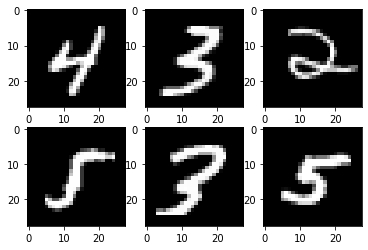

the model is  NN(
  (l1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=10, bias=True)
)
the model parameters are <generator object Module.parameters at 0x7f2e1f3d20d0>
the n value is 300
epoch 1/2, step 100/300,loss=0.4039
epoch 1/2, step 200/300,loss=0.3612
epoch 1/2, step 300/300,loss=0.3097
epoch 2/2, step 100/300,loss=0.2371
epoch 2/2, step 200/300,loss=0.3369
epoch 2/2, step 300/300,loss=0.2655
no of sample 10000
no of correct 9414
The model accuracy = 94.14


In [75]:
from os import cpu_count
from torch.functional import Tensor
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import numpy as np 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.datasets as datasets

device=torch.device('cuda' if torch.cuda.is_available else 'cpu')

input=784
hidden=100
classes=10
epoches=2
batch=200
learningrate=0.001


train_dataset=datasets.MNIST(
    root='dataset/',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
test_dataset=datasets.MNIST(
    root='dataset/',
    download=True,
    train=False,
    transform=transforms.ToTensor(),
)

train_loader=DataLoader(dataset=train_dataset,batch_size=batch,shuffle=True)
test_loader=DataLoader(dataset=test_dataset,batch_size=batch,shuffle=True)



ex=iter(train_loader)
#print('print iter train loader',ex)
samples,labels=ex.next()
#print('print sample',samples)
print('print labels',labels)


print(samples.shape)
print(labels.shape)


for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap='gray')
  #print('samples',samples)
plt.show()


class NN(nn.Module):
  def __init__(self,input,hidden,classes):
    super(NN,self).__init__()
    self.l1=nn.Linear(input,hidden)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden,classes)
    #self.relu=nn.ReLU()

  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)
    return out
  
model=NN (input,hidden,classes)
print('the model is ', model)

criterian=nn.CrossEntropyLoss()
#print('the criterion is ',criterian)

optimizer=torch.optim.Adam(model.parameters(),lr=learningrate)
#print('the opti is ',optimizer)

print('the model parameters are', model.parameters())


n=len(train_loader)
print('the n value is',n)
for E in range (epoches):
  for i, (images,labels) in enumerate (train_loader):
      #print('The images before reshaping',images)
      images=images.reshape(-1,28*28)
      labels=labels
      #print('The i is ',i)
      #print('The image',images)
      #print('the label',labels)

      outputs=model(images)
      #print('The outputs are',outputs)
      loss=criterian (outputs,labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if(i+1) % 100==0:
        print(f'epoch {E+1}/{epoches}, step {i+1}/{n},loss={loss.item():.4f}')


with torch.no_grad():
  correct=0
  samples=0
  for images,labels in test_loader:
    #print('Images  for accuracy loop',images)
    images=images.reshape(-1,28*28)
    labels=labels
    #print('the accuracy loop labels',labels)
    outputs=model(images)
    #print('the accuracy output is',outputs)

    _, predictions=torch.max(outputs,1)
    #print('predictions',predictions)
    samples += labels.shape[0]
    correct += (predictions == labels).sum().item()

  print('no of sample',samples)
  print('no of correct',correct)
  
  accuracy=(correct/ samples)*100
  print(f'The model accuracy = {accuracy}')


